In [196]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [197]:
data = pd.read_csv('./mushrooms.csv')

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [199]:
X = data.drop('class',axis=1)
Y = data['class']

In [200]:
X=pd.get_dummies(data.drop('class',axis=1))
X['bias']=1
Y = (np.atleast_2d(data['class']).T == 'p').astype(int)
x_train,x_test,y_train,y_test=train_test_split(X.values,Y,train_size=0.85,test_size=0.15)

In [201]:
theta = np.atleast_2d([ np.random.uniform(-1, 1, 118) ]).T
lr=1.2
rl=0.5
rl=theta*rl


In [202]:
cost_list=[]
for i in range(100):
    rl=theta*rl
    Z=np.dot(x_train,theta)
    sigmoid=1./(1+np.exp(-Z))
    hypothesis=sigmoid
    n=(lr/len(x_train))*(np.matmul(x_train.T,hypothesis-y_train)+rl)
    theta=theta-n
    cost = -(1/len(x_train))*np.sum( y_train*np.log(sigmoid) + (1-y_train)*np.log(1-sigmoid))
    cost_list.append(cost)

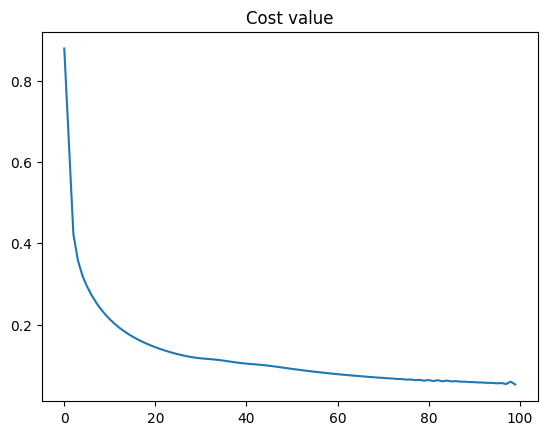

In [205]:
plt.plot(np.arange(100),cost_list)
plt.title('Cost value')
plt.show()